## Image classification with Convolutional Neural Networks

This is based on Jeremy Howard's original work of classifying "Cats vs Dogs". I decided to use the same architecture to build the network on a different and perhaps more exciting task.

## The task: 'Cricket vs Baseball'

We're going to create a model to label images based on whether they contain a batter(Baseball) or a batsman(Cricket). This post aims to build a basic model with relatively simple images. No exclusive pictures of pitchers, catchers, bowlers, fielders etc. 

In [1]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

Here we import the libraries we need.

In [2]:
from fastai.imports import *
# fastai is a library created to keep the standard practices/technologies available at one place.
# fastai is built on top of the PyTorch, library created by facebook developers
# PyTorch is an alternative to TensorFlow

In [3]:
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

`PATH` is the path to your data. 

`sz` is the size that the images will be resized to in order to ensure that the training runs quickly. 

In [4]:
PATH = "data/CricketBaseball/"
sz=224
PATH

'data/CricketBaseball/'

## First look at the pictures

The library will assume that we have *train* and *valid* directories. It also assumes that each directory will have subdirs for each class we wish to recognize (in this case, 'Baseball' and 'Cricket').

In [5]:
# Comment the below if you don't need to reset your precomputed activations
shutil.rmtree(f'{PATH}tmp', ignore_errors=True)

In [6]:
!tree -d data/CricketBaseball/

data/CricketBaseball/
├── models
├── train
│   ├── Baseball
│   └── Cricket
└── valid
    ├── Baseball
    └── Cricket

7 directories


In [7]:
files = os.listdir(f'{PATH}valid/Baseball')[:5]
files

['Screen Shot 2018-05-12 at 3.17.03 PM.png',
 'Screen Shot 2018-05-12 at 3.15.57 PM.png',
 'Screen Shot 2018-05-12 at 8.14.30 PM.png',
 'Screen Shot 2018-05-12 at 3.18.14 PM.png',
 'Screen Shot 2018-05-12 at 8.16.05 PM.png']

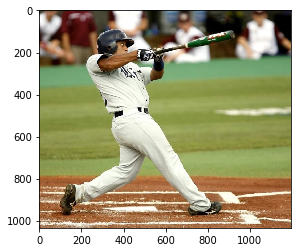

In [8]:
img = plt.imread(f'{PATH}valid/Baseball/{files[0]}')
plt.imshow(img);

Here is how the raw data looks like

In [9]:
img.shape

(1034, 1198, 4)

The numbers above mean the object names img contains `1034*1198*4` values

In [10]:
img.size

4954928

In [11]:
1034 * 1198 * 4

4954928

Let's have a look at what type of numbers are stored by selecting first 4 rows and columns.

In [12]:
img[:4,:4]
# First three numbers represent the color Red, Green and Blue for each pixel. 

array([[[0.28235, 0.26275, 0.17255, 1.     ],
        [0.28235, 0.26275, 0.16863, 1.     ],
        [0.28235, 0.26667, 0.16863, 1.     ],
        [0.28627, 0.27059, 0.17255, 1.     ]],

       [[0.28235, 0.26275, 0.17255, 1.     ],
        [0.28235, 0.26275, 0.16863, 1.     ],
        [0.28235, 0.26667, 0.16863, 1.     ],
        [0.28627, 0.27059, 0.17255, 1.     ]],

       [[0.28235, 0.26275, 0.17255, 1.     ],
        [0.28235, 0.26275, 0.16863, 1.     ],
        [0.28235, 0.26667, 0.16863, 1.     ],
        [0.28235, 0.27059, 0.17255, 1.     ]],

       [[0.28235, 0.26275, 0.17255, 1.     ],
        [0.28235, 0.26275, 0.17255, 1.     ],
        [0.27843, 0.26667, 0.17647, 1.     ],
        [0.27843, 0.27059, 0.17647, 1.     ]]], dtype=float32)

## Building a simple model

We're going to use a <b>pre-trained</b> model, that is, a model created by someone else to solve a different problem. Instead of building a model from scratch to solve a similar problem, we'll use a model trained on ImageNet (1.2 million images and 1000 classes) as a starting point. The model is a Convolutional Neural Network (CNN), a type of Neural Network that builds state-of-the-art models for computer vision. 

We will be using the <b>resnet34</b> model. resnet34 is a version of the model that won the 2015 ImageNet competition. Here is more info on [resnet models](https://github.com/KaimingHe/deep-residual-networks). 


In [13]:
# We are using pre-trained model called resnet34
arch=resnet34

## Following 3 lines of code is used to train the model

## ImageClassifierData.from_paths
# Read in images and their labels given as sub-folder names
# tfms: transformations (for data augmentations). e.g. output of `tfms_from_model`
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, sz))
learn = ConvLearner.pretrained(arch, data, precompute=True)
# We are working with two types of objects, data - contains training/validation set, learn - contains the model

## learn.fit()
# The first parameter in learn.fit specifies the learning rate
# The second parameter in learn.fit specifies the number of epochs
learn.fit(0.01, 4)

# For each epoch it produces training loss, validation loss and the accuracy.

100%|██████████| 1/1 [00:02<00:00,  2.27s/it]


epoch      trn_loss   val_loss   accuracy       
    0      1.289021   0.991551   0.25      
    1      1.156484   0.812032   0.4375         
    2      1.012042   0.668625   0.5625         
    3      0.843908   0.548285   0.8125          



[array([0.54828]), 0.8125]

As you can see in 4 epochs we were able to achieve the accuracy of 0.81 on validation data.(meaning 81% of the images were classified correctly).

Now let's revisit the directory structure. We will find some new content.

In [14]:
!tree -d data/CricketBaseball

data/CricketBaseball
├── models
├── tmp
│   ├── x_act_resnet34_0_224.bc
│   │   ├── data
│   │   └── meta
│   ├── x_act_test_resnet34_0_224.bc
│   │   ├── data
│   │   └── meta
│   └── x_act_val_resnet34_0_224.bc
│       ├── data
│       └── meta
├── train
│   ├── Baseball
│   └── Cricket
└── valid
    ├── Baseball
    └── Cricket

17 directories


## Analyzing results: looking at pictures

As well as looking at the overall metrics, it's also a good idea to look at examples of each of:
1. A few correct labels at random
2. A few incorrect labels at random
3. The most correct labels of each class (i.e. those with the highest probability that are correct)
4. The most incorrect labels of each class (i.e. those with the highest probability that are incorrect)
5. The most uncertain labels (i.e. those with probability closest to 0.5).

In [15]:
# This is the label for a val data
data.val_y

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1])

In [16]:
# from here we know that 'Baseball' is label 0 and 'Cricket' is label 1.
data.classes

['Baseball', 'Cricket']

In [17]:
# this gives prediction for validation set. Predictions are in log scale
log_preds = learn.predict()
log_preds.shape

(16, 2)

In [18]:
log_preds[:10]
# The way most models in pytorch (and so the fastai) work is by returning the log of the prediction 
# rather than probabilities themselves

array([[-0.40494, -1.09966],
       [-1.54779, -0.23917],
       [-0.60375, -0.79133],
       [-0.47886, -0.96623],
       [-0.45962, -0.99838],
       [-0.45873, -0.99991],
       [-0.51881, -0.90443],
       [-1.45393, -0.26612],
       [-1.16995, -0.37162],
       [-0.53219, -0.88508]], dtype=float32)

In [19]:
# In order to understand the prediction output value, we need to normalize the data
preds = np.argmax(log_preds, axis=1)  # from log probabilities to 0 or 1
# We use the exp (calculate the exponential of all elements in the input array) to convert log of probs into probs
probs = np.exp(log_preds[:,1])        # pr(Cricket)

In [20]:
# A function for randomly selecting 2 samples, from the given index (called mask)
def rand_by_mask(mask): return np.random.choice(np.where(mask)[0], 2, replace=False)
# A function which calls rand_by_mask with correct predictions
def rand_by_correct(is_correct): return rand_by_mask((preds == data.val_y)==is_correct)

In [21]:
# A function to plot images with titles
def plot_val_with_title(idxs, title):
    imgs = np.stack([data.val_ds[x][0] for x in idxs])
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(data.val_ds.denorm(imgs), rows=1, titles=title_probs)

In [22]:
# A function defining how to plot
def plots(ims, figsize=(12,6), rows=1, titles=None):
    f = plt.figure(figsize=figsize)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows, i+1)
        sp.axis('Off')
        if titles is not None: sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i])

In [23]:
def load_img_id(ds, idx): return np.array(PIL.Image.open(PATH+ds.fnames[idx]))

def plot_val_with_title(idxs, title):
    imgs = [load_img_id(data.val_ds,x) for x in idxs]
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(imgs, rows=1, titles=title_probs, figsize=(16,8))

Correctly classified


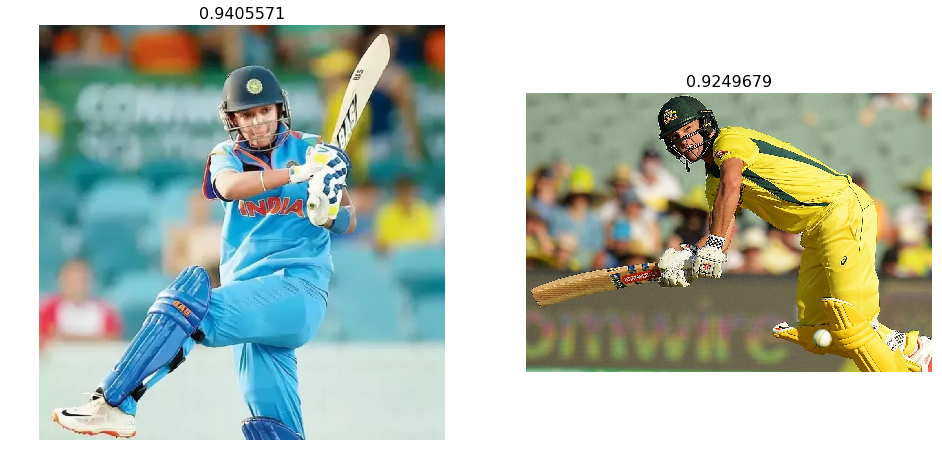

In [26]:
# 1. A few correct labels at random
plot_val_with_title(rand_by_correct(True), "Correctly classified")

Incorrectly classified


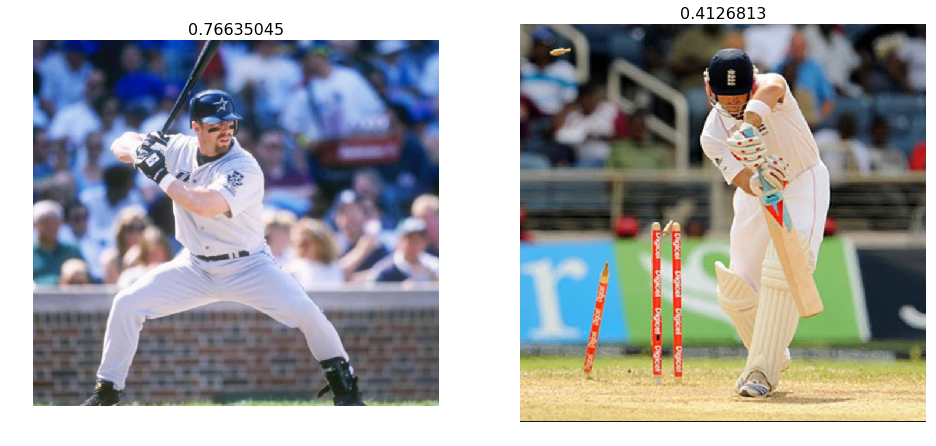

In [27]:
# 2. A few incorrect labels at random
plot_val_with_title(rand_by_correct(False), "Incorrectly classified")

This is interesting! 

I had chosen a few images in validation dataset slightly deviating away from the common pattern in the training dataset. For example, in the first image above (Baseball-image) we do not see the ground unlike the ones in training data. In the second image above (Cricket-image) the third stump is not in place.

In [28]:
def most_by_mask(mask, mult):
    idxs = np.where(mask)[0]
    return idxs[np.argsort(mult * probs[idxs])[:4]]

def most_by_correct(y, is_correct): 
    mult = -1 if (y==1)==is_correct else 1
    return most_by_mask(((preds == data.val_y)==is_correct) & (data.val_y == y), mult)

Most correct Baseball Players


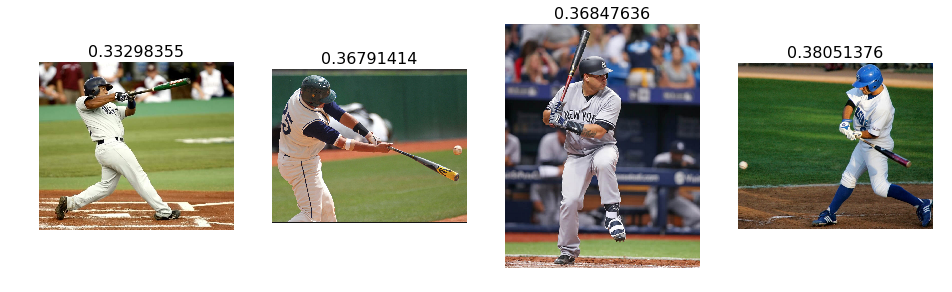

In [29]:
plot_val_with_title(most_by_correct(0, True), "Most correct Baseball Players")

Most correct Cricket players


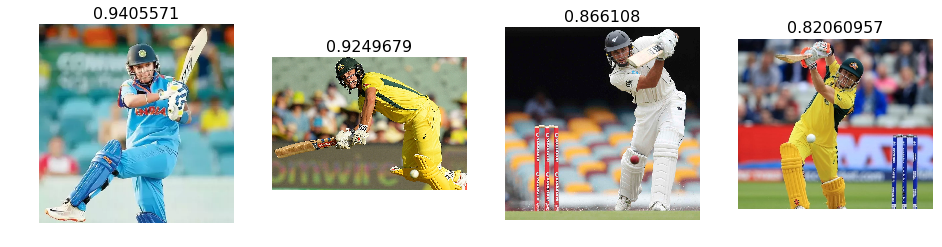

In [30]:
plot_val_with_title(most_by_correct(1, True), "Most correct Cricket players")

Most incorrect Baseball players


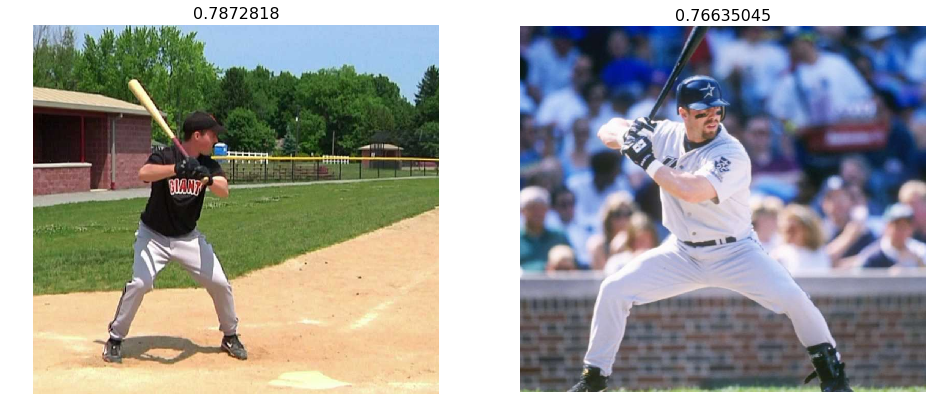

In [31]:
plot_val_with_title(most_by_correct(0, False), "Most incorrect Baseball players")

Most incorrect Cricket Players


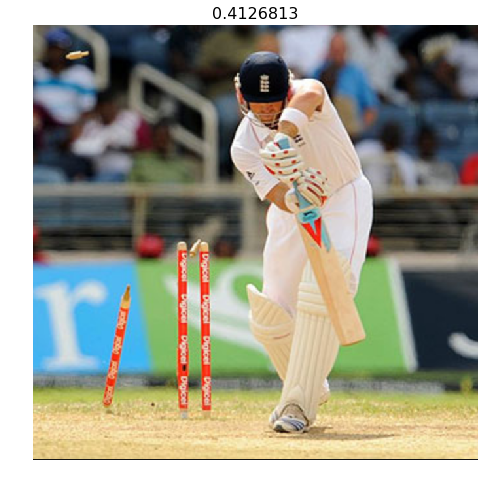

In [32]:
plot_val_with_title(most_by_correct(1, False), "Most incorrect Cricket Players")


Most uncertain predictions


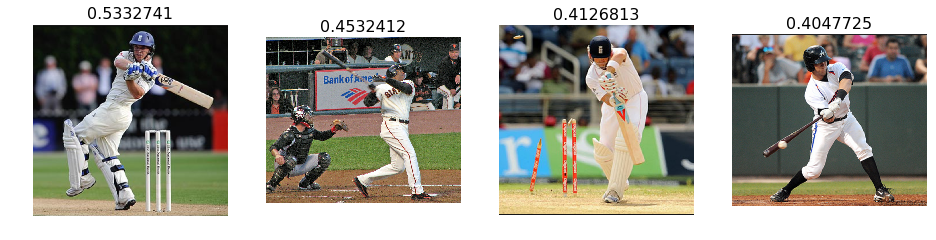

In [33]:
most_uncertain = np.argsort(np.abs(probs -0.5))[:4]
plot_val_with_title(most_uncertain, "Most uncertain predictions")

I believe with more training data and increasing number of epochs the performance could be increased.  In the next post I hope to do more experiment with fine-tuning the model with a slightly more difficult problem.

Here is the quick summary of this post
1. We used fast.ai deep learning library which uses PyTorch and contains many useful deep learning packages.  
2. We used a two-class-classification system and pre-trained model 'ResNet'.
3. In 5 epochs the model was able to achieve the accuracy of 81% of the validation dataset.